<a href="https://colab.research.google.com/github/said-rasidin/ML_Project/blob/master/Cat_Dog_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms, models
from torch import nn
from torch import optim

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip -P "/content/drive/My Drive/image_set"

pathconf: Transport endpoint is not connected
--2020-05-24 15:31:12--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.39.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.39.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
/content/drive/My Drive/image_set: Transport endpoint is not connected
/content/drive/My Drive/image_set/Cat_Dog_data.zip: Transport endpoint is not connected

Cannot write to ‘/content/drive/My Drive/image_set/Cat_Dog_data.zip’ (Success).


In [13]:
!mkdir "/content/gdrive/My Drive/Cat_Dog_data"
!unzip "/content/gdrive/My Drive/image_set/Cat_Dog_data.zip" -d "/content/gdrive/My Drive/Cat_Dog_data"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/gdrive/My Drive/Cat_Dog_data/__MACOSX/Cat_Dog_data/train/dog/._dog.8636.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/Cat_Dog_data/train/dog/dog.7505.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/__MACOSX/Cat_Dog_data/train/dog/._dog.7505.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/Cat_Dog_data/train/dog/dog.1174.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/__MACOSX/Cat_Dog_data/train/dog/._dog.1174.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/Cat_Dog_data/train/dog/dog.9528.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/__MACOSX/Cat_Dog_data/train/dog/._dog.9528.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/Cat_Dog_data/train/dog/dog.1612.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/__MACOSX/Cat_Dog_data/train/dog/._dog.1612.jpg  
  inflating: /content/gdrive/My Drive/Cat_Dog_data/Cat_Dog_data/train/dog/dog.8150.jp

In [0]:
data_dir = "/content/drive/My Drive/Cat_Dog_data/Cat_Dog_data"

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [0]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

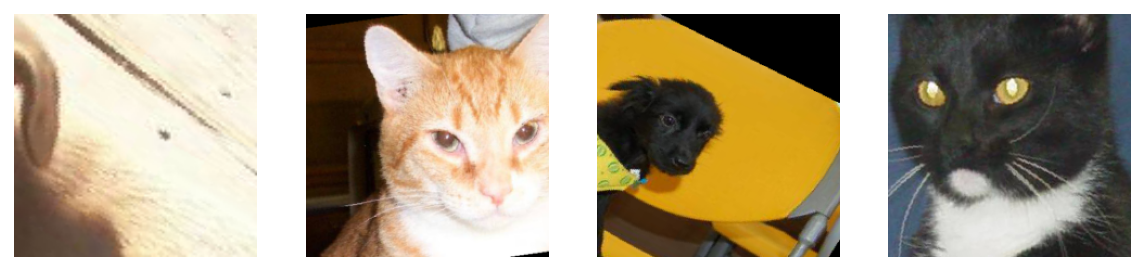

In [24]:
images, labels = next(iter(trainloader))
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

In [25]:
model = models.vgg16(pretrained=True)
model.parameters()

<generator object Module.parameters at 0x7f767d70ddb0>

In [26]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.vgg16(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(in_features=25088, out_features=4096),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5),
                                 nn.Linear(in_features=4096, out_features=1000),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5),
                                 nn.Linear(in_features=1000, out_features=500),
                                 nn.Linear(500, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
import time 

for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

Device = cpu; Time per batch: 4.212 seconds
Device = cuda; Time per batch: 0.008 seconds


In [31]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/1.. Train loss: 97.037.. Test loss: 10.268.. Test accuracy: 0.506
Epoch 1/1.. Train loss: 5.604.. Test loss: 0.522.. Test accuracy: 0.721
Epoch 1/1.. Train loss: 1.349.. Test loss: 0.471.. Test accuracy: 0.718
Epoch 1/1.. Train loss: 0.735.. Test loss: 0.363.. Test accuracy: 0.800
Epoch 1/1.. Train loss: 0.541.. Test loss: 0.224.. Test accuracy: 0.923
Epoch 1/1.. Train loss: 0.443.. Test loss: 0.185.. Test accuracy: 0.919
Epoch 1/1.. Train loss: 0.492.. Test loss: 0.155.. Test accuracy: 0.939
Epoch 1/1.. Train loss: 0.299.. Test loss: 0.136.. Test accuracy: 0.951
Epoch 1/1.. Train loss: 0.376.. Test loss: 0.167.. Test accuracy: 0.924
Epoch 1/1.. Train loss: 0.377.. Test loss: 0.129.. Test accuracy: 0.952
Epoch 1/1.. Train loss: 0.373.. Test loss: 0.127.. Test accuracy: 0.959
Epoch 1/1.. Train loss: 0.340.. Test loss: 0.123.. Test accuracy: 0.957
Epoch 1/1.. Train loss: 0.402.. Test loss: 0.113.. Test accuracy: 0.957
Epoch 1/1.. Train loss: 0.323.. Test loss: 0.130.. Test accura

KeyboardInterrupt: ignored